In [1]:
#Various Python modules for basic needs.
import numpy as np
import matplotlib.pyplot as plt
import time
import sys

#Core Libra routines for model potentials, data types, etc.
from liblibra_core import *
import libra_py.models.Holstein as Holstein
import util.libutil as comn
import libra_py.data_savers as data_savers

#QTAG modules implemented in Libra.
import libra_py.dynamics.qtag.compute as compute
import libra_py.dynamics.qtag.initialize as initialize
import libra_py.dynamics.qtag.plot as plot
import libra_py.dynamics.qtag.save as save

<frozen importlib._bootstrap>:228: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:228: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:228: RuntimeWarning: to-Python converter for std::vector<std::vector<float, std::allocator<float> >, std::allocator<std::vector<float, std::allocator<float> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:228: RuntimeWar

In [2]:
class tmp:
    pass

In [3]:
def compute_model(q, model_params, full_id):

    model = model_params["model"]
    res = None
    
    if model==0:
        res = Holstein.Holstein5(q, model_params, full_id)
    else:
        print("Unrecognized model! Check for correct model import statement.")

    return res

In [4]:
#Potential parameters for Holstein5
model_params = {
    "model":0,
    "deriv_lvl":2,
    "E_n":[0.0,15.8114],
    "x_n":[0.0,1.0],
    "k_n":[10.0,10.0],
    "V":[[0.0,1.0],[1.0,0.0]],
    "alpha":[[0.0,1.5811],[1.5811,0.0]],
    "x_nm":[[0.0,2.0],[2.0,0.0]],
    "ex_cpl_A":1.0,
    "ex_cpl_B":1.5811,
    "ex_cpl_C":2.0
}

In [5]:
#Parameters for general simulation
dyn_params = {
    "init_placement":0,
    "wfc_q0":[-2.0], "wfc_p0":[0.0], "wfc_a0":[1.0], "wfc_s0":[0.0],
    "states":[0, 1],
    "grid_dims":[25], "alp_scl":[6.0], "rho_cut":1e-12
}


ntraj, Q, P, A, S, active_states = initialize.initialize(dyn_params)

In [6]:
Q0 = MATRIX(1,1); Q0.set(0,0, dyn_params["wfc_q0"][0])
P0 = MATRIX(1,1); P0.set(0,0, dyn_params["wfc_p0"][0])
A0 = MATRIX(1,1); A0.set(0,0, dyn_params["wfc_a0"][0])
S0 = MATRIX(1,1); S0.set(0,0, dyn_params["wfc_s0"][0])
istate = [0]

C = initialize.coeffs(Q0, P0, A0, S0, istate, Q, P, A, S, active_states)

In [7]:
# 1D mass
iM = MATRIX(1, 1);  iM.set(0,0,1.0);

#Parameters for general simulation
dyn_params = {
    "target_states":[0,1], "states":[0,1],
    "dt":0.01, "nsteps":800, "iM":iM,
    "hdf5_output_level":0, "txt2_output_level":3, 
    "properties_to_save":["time","Etot","pops","q","p","a","coeffs"],
    "q_update_method":1, "p_update_method":1, "a_update_method":1, "s_update_method":0,  
    "q_sync_method":1, "p_sync_method":0, "a_sync_method":0, "s_sync_method":0,
    "mom_calc_type":1, "linfit_beta":1e-3, "decpl_den":0.1, "d_weight":1.0,
    "qtag_pot_approx_method":3,
    "prefix":"holstein"
}


compute.run_qtag(Q, P, A, S, active_states, C, iM, dyn_params, compute_model, model_params)

21.055555554609754 [0.9999999999576256, 4.766053159009527e-14]
21.054279840986787 [0.999999999984173, 4.226980467352465e-13]
21.049120216625603 [1.000000000069553, 1.1395403809122524e-12]
21.04435988875566 [1.000000000065808, 2.1335111708885215e-12]
21.0400161578297 [1.0000000000491025, 3.3138314703187958e-12]
21.036105120634577 [0.9999999999995561, 4.571371360820575e-12]
21.032642596713398 [1.000000000075835, 5.788145906957433e-12]
21.029643634492672 [1.000000000114874, 6.847849419756943e-12]
21.027122989679317 [1.0000000001386236, 7.646639723559194e-12]
21.025095557072568 [1.0000000000127154, 8.103358522073289e-12]
21.02357573172792 [0.9999999999726692, 8.16840021596573e-12]
21.022576654835984 [0.9999999999802905, 7.83054192923927e-12]
21.02211018953643 [0.999999999931964, 7.121183749219439e-12]
21.022188188421897 [0.9999999999042589, 6.115639490206741e-12]
21.022819173717338 [0.9999999999870781, 4.931330526434861e-12]
21.024009699726598 [1.0000000000589597, 3.722984634924546e-12]
21

20.917957154609123 [0.8523499513509838, 0.14764994206832927]
20.92402240794241 [0.8521085594038224, 0.1478913339114051]
20.9297104154031 [0.8519684875218848, 0.14803140564297668]
20.934986252206023 [0.8519138801299867, 0.1480860129542092]
20.93982441675025 [0.8519295276103119, 0.1480703653703254]
20.94419974867943 [0.8520011814725869, 0.1479987114686179]
20.948093394106024 [0.8521157876744492, 0.1478841051727681]
20.951492319837843 [0.8522616418353443, 0.14773825082247974]
20.954384750565268 [0.8524284724013778, 0.14757142029338316]
20.956764396465047 [0.8526074618129699, 0.14739243081260606]
20.958626717774294 [0.8527912205019046, 0.14720867199365076]
20.959971222244494 [0.8529737223268842, 0.14702617034383417]
20.960799972821942 [0.8531502146093562, 0.1468496779813289]
20.96111684972772 [0.853317110732951, 0.14668278180265004]
20.960927539569933 [0.8534718702527985, 0.14652802219018]
20.96023962512494 [0.8536128729319338, 0.14638701967043455]
20.959062109626167 [0.8537392875499209, 0

20.706043324744996 [0.8154638983480926, 0.1845359181052434]
20.698171374087174 [0.8112026506780347, 0.18879716535298466]
20.690202533126183 [0.8067570088139778, 0.19324280684885942]
20.68215436287168 [0.8021382427713644, 0.19786157269084703]
20.674038604248498 [0.7973577521091169, 0.20264206285302]
20.665868368333395 [0.7924268155139801, 0.2075729992080054]
20.657653895448508 [0.7873563791156848, 0.21264343542841313]
20.649410004543082 [0.7821568926959701, 0.21784292162070046]
20.641144127576524 [0.7768381932136793, 0.22316162069362244]
20.632869339247804 [0.7714094346771929, 0.22859037899815954]
20.624592402538912 [0.7658790618646962, 0.23412075126036624]
20.61632876055328 [0.7602548238650607, 0.23974498898703617]
20.608090491567502 [0.7545438176960187, 0.24545599482503075]
20.599890521731332 [0.7487525603247877, 0.25124725164659895]
20.59173831914045 [0.7428870789737058, 0.25711273282952757]
20.58366585696572 [0.7369530157043456, 0.2630467957221665]
20.575691328608624 [0.730955742855

20.424654145769313 [0.5569946233907576, 0.44299349277534517]
20.425337358523144 [0.5569809992822778, 0.44300710088494444]
20.426273405659007 [0.5569641091627189, 0.44302397244511205]
20.427455289049362 [0.5569430904306638, 0.4430449687637646]
20.428874159119783 [0.5569169550159884, 0.44307107697688436]
20.430519433327497 [0.5568846038844374, 0.44310339376553354]
20.432378957678093 [0.5568448532031682, 0.4431431014207963]
20.43443697554484 [0.5567964708115108, 0.44319142910409226]
20.436683403167734 [0.5567382235469833, 0.44324960645037714]
20.439098046964133 [0.556668937323856, 0.4433188028558079]
20.441666691194797 [0.5565875631349012, 0.4434000592886422]
20.44437268223292 [0.5564932532509468, 0.4434942125373899]
20.44719632468628 [0.5563854397873582, 0.44360181114295694]
20.45012378755418 [0.5562639168008129, 0.44372303030481275]
20.4531338622306 [0.5561289239588928, 0.4438575838798196]
20.45621081414165 [0.555981227766403, 0.44400463875328006]
20.45933859388688 [0.5558222019912896, 

20.409636139128814 [0.43283521695847155, 0.566701831152795]
20.412949055936725 [0.43292695903100165, 0.5665913541111656]
20.416125284797303 [0.43300222770752067, 0.5664986372338724]
20.41907622385521 [0.43306340517217223, 0.5664218106959257]
20.421728816590043 [0.4331126806276974, 0.566359010039313]
20.424021848181667 [0.4331519542241674, 0.5663084064208043]
20.425910217257655 [0.4331828595122766, 0.5662682473426898]
20.427356741629744 [0.4332068550068473, 0.5662368953529905]
20.428336109165116 [0.4332252861440148, 0.5662128543733286]
20.42883245187152 [0.43323935815409675, 0.5661947850491816]
20.428857898943 [0.43325005250639265, 0.5661815041524944]
20.428457968645723 [0.43325807293718366, 0.5661719856609587]
20.427702935510098 [0.4332638988041668, 0.5661653589195834]
20.426664561898075 [0.4332679075372943, 0.566160908050264]
20.425393091159716 [0.4332704602919956, 0.5661580675599678]
20.423910867668695 [0.4332719038641544, 0.5661564082422169]
20.4222214753124 [0.43327252773955877, 0.

20.275444098317283 [0.5883429896428864, 0.41044528076104764]
20.271832190151986 [0.590774419552397, 0.4080129822357858]
20.268287022513164 [0.5931016824159738, 0.405684913318987]
20.26479098171182 [0.5953289780632999, 0.4034568587986896]
20.261344214953287 [0.5974611879529125, 0.4013239386991262]
20.257946147099474 [0.5995037617017656, 0.3992807100365297]
20.25459621951393 [0.6014625781625221, 0.3973212910374942]
20.251296479835464 [0.6033437993585306, 0.3954395050039964]
20.248048010813033 [0.6051537097315605, 0.3936290463235703]
20.24485660643165 [0.6068985329856214, 0.39188366578838685]
20.24173114186864 [0.6085842341786087, 0.3901973734047352]
20.23869047704333 [0.6102163073410853, 0.3885646548042703]
20.235745946477433 [0.6117995587181715, 0.38698068411375947]
20.232919317539526 [0.6133379085877161, 0.3854415218234136]
20.230221199716553 [0.6148342344663077, 0.38394427304166784]
20.227659508704562 [0.6162902749052457, 0.3824871887277106]
20.22524803675549 [0.6177066010245573, 0.38

(<liblibra_core.MATRIX at 0x7f36da7c3f40>,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 <liblibra_core.CMATRIX at 0x7f36da7c53c0>)

Number of files = 5


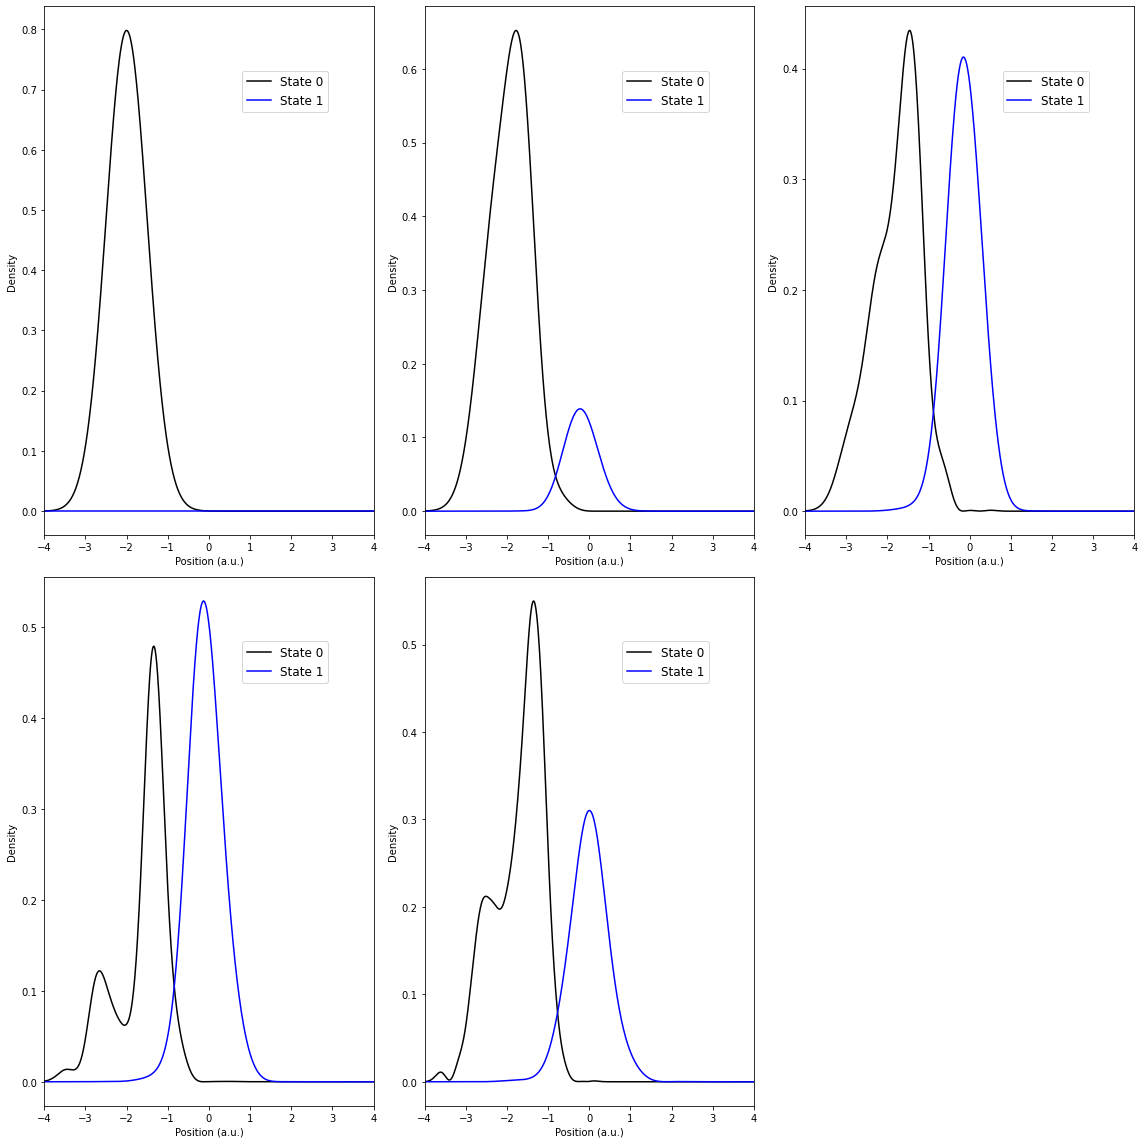

In [8]:
#Plot parameters dictionary definitions for wavefunction output...
plt_params = {'prefix':dyn_params['prefix'], 'which_states':[0,1], 
              'size':(16,16), 'xmin':[-4.0],'xmax':[4.0],
              'npoints':[800], 'snaps':[0,199,399,599,799],
              'xlabel':'Position (a.u.)', 'ylabel':'Density', 'zlabel':'N/A',
              '1Dcolors':['Black','Blue'], '2Dcolors':['Reds','Blues'],
              'legend_loc':(0.6,0.8), 'legend_size':12,
              "grid_dims":[25]
             }

dyn_params.update( { "grid_dims":[25], "ndof":1 } )

#Call wf_calc_nD to calculate gridded wavefunction data from coefficients and qpas output...
compute.wf_calc_nD(dyn_params, plt_params, plt_params['prefix'])

#Plot the selected snapshots...
plot.wf_plot(dyn_params, plt_params)

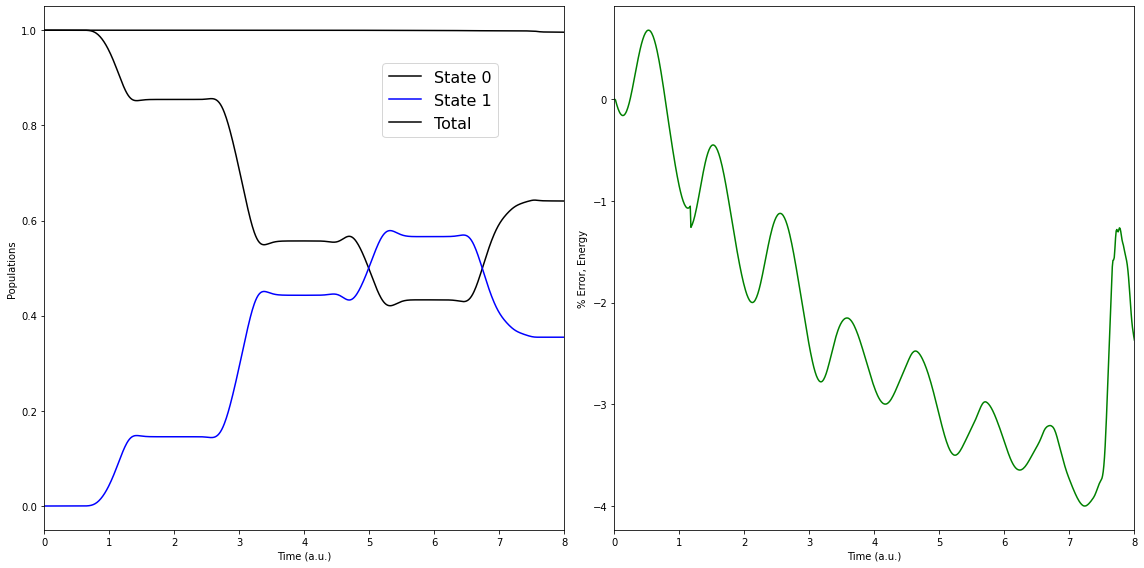

In [9]:
#Plot parameters dictionary definitions for energy/population output...
plt_params = {'prefix':dyn_params['prefix'], 'size':(16,8), 'xmin':[0], 'xmax':[8.0], 
              '1Dcolors':['Black','Blue'], 'legend_loc':(0.65,0.75), 'legend_size':16}

#Plot the graphs...
plot.energy_and_pops(dyn_params, plt_params)

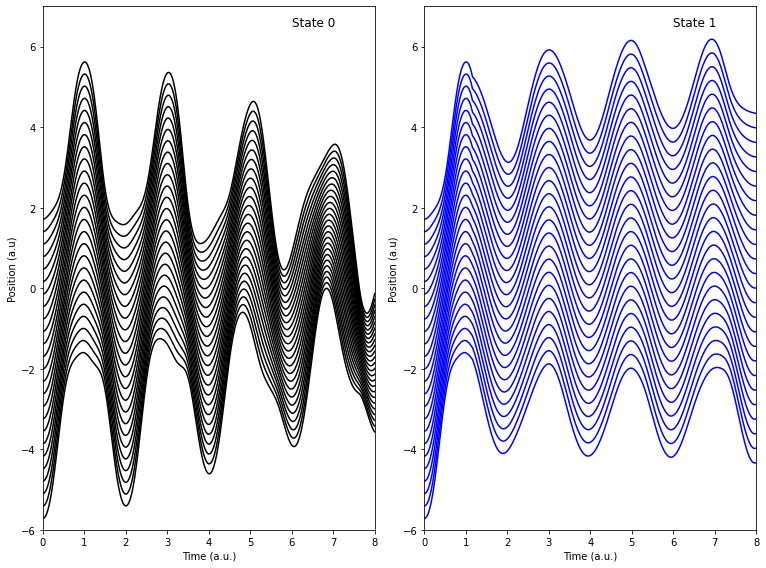

In [10]:
#Plot parameters dictionary definitions for trajectory output...
plt_params = {'prefix':dyn_params['prefix'], 'which_states':[0, 1], 'which_traj':'all', 
              'size':(16,8), 'xmin':[0,-6.0],'xmax':[8.0,7.0],
              'xlabel':'Time (a.u.)', 'ylabel':'Position (a.u)', 'zlabel':'N/A',
              '1Dcolors':['Black','Blue']}

#Plot the output...
plot.trajectories(dyn_params, plt_params)